In [1]:
# Import the kagglehub library, which allows you to download datasets directly from Kaggle
import kagglehub  

# Download the "flowers-recognition" dataset by the Kaggle user "alxmamaev"
# The dataset_download() function returns the local path where the dataset is saved
alxmamaev_flowers_recognition_path = kagglehub.dataset_download('alxmamaev/flowers-recognition')

# Print a message to indicate that the dataset has been successfully downloaded and ready for use
print('Data source import complete.')

/home/almirante_ming/.asdf/installs/python/3.12.10/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.


In [2]:
# Import the built-in 'os' module for interacting with the operating system
import os

# Import pandas as 'pd', a library for data analysis and manipulation
import pandas as pd

# Import NumPy as 'np', a library for numerical operations and working with arrays
import numpy as np

# Import seaborn as 'sns', a statistical data visualization library based on matplotlib
import seaborn as sns

# Import matplotlib's pyplot module for creating plots and charts
import matplotlib.pyplot as plt

# Import the 'imread' function from matplotlib.image for reading images from files
from matplotlib.image import imread

# Import TensorFlow as 'tf', a deep learning and machine learning framework
import tensorflow as tf

# Import the 'requests' library for sending HTTP requests (e.g., downloading images from URLs)
import requests

# Import the Image class from PIL (Python Imaging Library) for image processing
from PIL import Image

# Import BytesIO from io to handle binary data in memory (useful for working with image data from requests)
from io import BytesIO


# ----------------- Warning handling -----------------

# Import 'warnings' module to control warning messages in Python
import warnings

# Ignore all warning messages in the output
warnings.filterwarnings("ignore")

# Issue a warning message — but this one will not show because warnings are ignored above
warnings.warn("this will not show")


# ----------------- Pandas display settings -----------------

# Set pandas to always display floating-point numbers with 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

2025-09-08 22:24:36.289980: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-08 22:24:43.005205: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-08 22:24:55.138605: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [1]:
# ----------------- Data splitting and augmentation -----------------

# Import train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import ImageDataGenerator for generating batches of augmented image data for training
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import commonly used Keras layers for CNN architectures:
# Activation - applies activation functions like ReLU, softmax
# Dropout - randomly drops neurons during training to prevent overfitting
# Flatten - converts multi-dimensional arrays to 1D for dense layers
# Dense - fully connected neural network layer
# Conv2D - 2D convolution layer for extracting features from images
# MaxPooling2D - downsampling layer to reduce spatial dimensions
# BatchNormalization - normalizes activations to improve training stability
# Dropout (repeated import, but same as above)
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout


# ----------------- Training callbacks -----------------

# Import EarlyStopping to stop training when validation loss stops improving
from tensorflow.keras.callbacks import EarlyStopping


# ----------------- Model evaluation metrics -----------------

# Import classification_report (precision, recall, f1-score) and confusion_matrix from sklearn
from sklearn.metrics import classification_report, confusion_matrix


# ----------------- Transfer learning and advanced layers -----------------

# Dense - fully connected layer
# GlobalAveragePooling2D - reduces spatial dimensions by averaging each feature map
from keras.layers import Dense, GlobalAveragePooling2D

# Import image preprocessing utilities
from tensorflow.keras.preprocessing import image

# Convert labels to one-hot encoding
from keras.utils import to_categorical

# Import pre-trained EfficientNetB3 model for transfer learning
from tensorflow.keras.applications import EfficientNetB3

# Import pre-trained VGG16 model for transfer learning
from tensorflow.keras.applications import VGG16

# Import Keras layers and models API for building neural networks
from tensorflow.keras import layers, models

# Sequential model class for stacking layers linearly
from tensorflow.keras.models import Sequential

# Preprocessing function for VGG16 (scales and normalizes image pixel values)
from tensorflow.keras.applications.vgg16 import preprocess_input

# Adam optimizer for training deep learning models
from tensorflow.keras.optimizers import Adam

# Keras Model class for creating models with custom architectures
from keras.models import Model


# ----------------- File and image handling -----------------

# os - operating system operations like file path handling
import os

# random - for generating random numbers or selecting random samples
import random

# shutil - high-level file operations like copying and moving files
import shutil

# cv2 (OpenCV) - computer vision library for image and video processing
import cv2

# tqdm - progress bar for loops
from tqdm import tqdm

# imread from skimage.io - reads image files into NumPy arrays
from skimage.io import imread

2025-09-09 07:56:49.767591: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-09 07:56:50.891021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-09 07:56:54.675998: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [4]:
# List of flower class names (categories)
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# X will store the image data (features)
X = []

# Z will store the corresponding numerical labels for each image
Z = []

# Function to assign a numeric label for each flower type
def assign_label(flower_type):
    if flower_type == 'daisy':
        return 1
    elif flower_type == 'dandelion':
        return 2
    elif flower_type == 'rose':
        return 3
    elif flower_type == 'sunflower':
        return 4
    elif flower_type == 'tulip':
        return 0


# Path to the dataset folder (contains subfolders for each flower type)
inputdataset = "./kaggle/input/flowers-recognition/flowers"

# Loop through each subfolder (flower category) in the dataset
for flower in os.listdir(inputdataset):
    flower_path = os.path.join(inputdataset, flower)  # Get full path to this category folder
    
    # Skip if it's not a directory (sometimes there may be files)
    if not os.path.isdir(flower_path):
        continue

    # Loop through all images in the current category
    for filename in os.listdir(flower_path):
        img_path = os.path.join(flower_path, filename)  # Full path to the image
        
        # Read the image in color mode using OpenCV
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)

        # If the image can't be read, skip it
        if img is None:
            print(f"Warning: {img_path} could not be loaded.")
            continue

        # Resize image to 224x224 pixels (standard for many CNN models like VGG, EfficientNet)
        img = cv2.resize(img, (224, 224))
        
        # Get the numeric label for the flower category
        label = assign_label(flower)
        
        # Append the normalized image (pixel values scaled to 0-1) to X
        X.append(np.array(img / 255))
        
        # Append the label to Z
        Z.append(label)

# Convert the image list and labels to NumPy arrays for efficient computation
X = np.array(X)
Z = np.array(Z)

# Convert labels to one-hot encoding for classification (5 categories)
Y = to_categorical(Z, 5)

# Split the dataset into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3453, 224, 224, 3)
x_test shape:  (864, 224, 224, 3)
y_train shape:  (3453, 5)
y_test shape:  (864, 5)


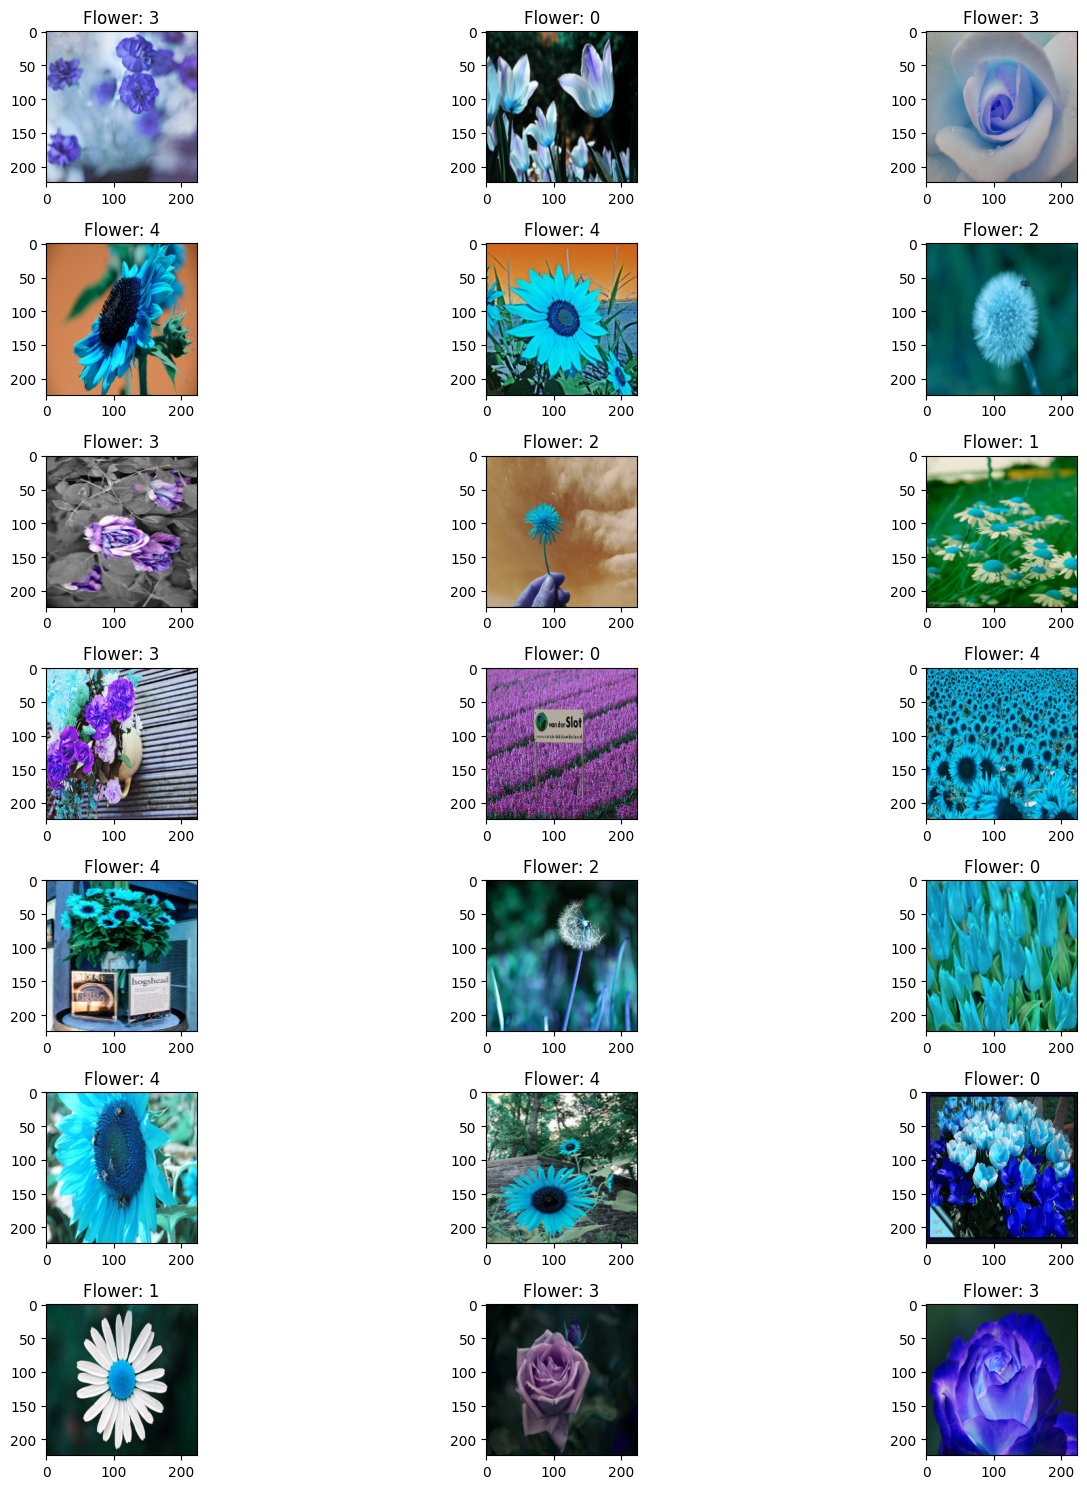

In [5]:
# Create a matplotlib figure with a 7x3 grid of subplots
figure, axes = plt.subplots(7, 3)

# Set the overall figure size to 15 inches by 15 inches
figure.set_size_inches(15, 15)

# Loop through each row in the 7x3 grid
for row in range(7):
    # Loop through each column in the 7x3 grid
    for col in range(3):
        # Pick a random index from the dataset
        index = random.randint(0, len(X) - 1)   

        # Get the image from the dataset
        image = X[index]

        # Get the corresponding label for that image
        flower_label = Z[index]        

        # Display the image on the subplot at (row, col)
        axes[row, col].imshow(image)

        # Set the title of the subplot to show the flower label (numeric ID)
        axes[row, col].set_title(f"Flower: {flower_label}")

# Adjust spacing between subplots so titles/images don't overlap
plt.tight_layout()

# Display the figure
plt.show()

In [6]:
# Loop through each flower category in the classes list
for flower_type in classes:
    # Create the path to the folder containing images of the current flower type
    class_directory = os.path.join(inputdataset, flower_type)    

    # Lists to store the max and min pixel values for each image in this class
    max_pixel_values = []
    min_pixel_values = []   

    # Loop through all image files in this flower's directory
    for img_file in os.listdir(class_directory):
        # Read the image as a NumPy array using skimage's imread
        image = imread(os.path.join(class_directory, img_file))
        
        # Append the highest pixel value in this image to the list
        max_pixel_values.append(image.max())
        
        # Append the lowest pixel value in this image to the list
        min_pixel_values.append(image.min())    

    # Find the overall maximum pixel value across all images in this class
    max_value_per_class = np.max(max_pixel_values)
    
    # Find the overall minimum pixel value across all images in this class
    min_value_per_class = np.min(min_pixel_values)    

    # Print results for this flower type
    print("***************************")
    print(f"Flower Type: {flower_type}")
    print(f"Maximum Pixel Value: {max_value_per_class}")
    print(f"Minimum Pixel Value: {min_value_per_class}")

# Final separator line after the loop ends
print("***************************")

***************************
Flower Type: daisy
Maximum Pixel Value: 255
Minimum Pixel Value: 0
***************************
Flower Type: dandelion
Maximum Pixel Value: 255
Minimum Pixel Value: 0
***************************
Flower Type: rose
Maximum Pixel Value: 255
Minimum Pixel Value: 0
***************************
Flower Type: sunflower
Maximum Pixel Value: 255
Minimum Pixel Value: 0
***************************
Flower Type: tulip
Maximum Pixel Value: 255
Minimum Pixel Value: 0
***************************


In [4]:
# Initialize an empty list to store the number of images per flower class
flower_counts = []

# Loop through each flower class
for flower_class in classes:
    # Get the path to the folder for this flower class
    class_path = os.path.join(inputdataset, flower_class)
    
    # Count the number of image files in this class folder and store it
    flower_counts.append(len(os.listdir(class_path)))

# Create a figure for the bar plot with a size of 15x5 inches
plt.figure(figsize=(15, 5))

# Create a horizontal bar plot with Seaborn
# x = number of samples, y = class names, color palette = "viridis"
bar_plot = sns.barplot(x=flower_counts, y=classes, palette="viridis")

# Add numerical labels on each bar showing the count value
bar_plot.bar_label(bar_plot.containers[0], fontsize=15)

# Add a title to the plot
plt.title("Count of Flowers by Class", fontsize=25, fontweight="bold")

# Label the X-axis
plt.xlabel("Number of Samples", fontsize=15)

# Label the Y-axis
plt.ylabel("Flower Classes", fontsize=15)

# Display the plot
plt.show()

NameError: name 'classes' is not defined

In [ ]:
# Function to display a few random file names from a given directory
def display_random_files(inputdataset, num_samples=10):
    # Check if the given directory exists
    if os.path.exists(inputdataset):
        # List all files in the directory
        files = os.listdir(inputdataset)
        
        # Randomly select up to 'num_samples' files (or fewer if the folder has less files)
        random_files = random.sample(files, min(num_samples, len(files)))
        
        # Print the selected random files with the folder's name
        print(f"Random files in {os.path.basename(inputdataset)}: {random_files}")
    else:
        # If the folder doesn't exist, print a warning
        print(f"{os.path.basename(inputdataset).capitalize()} does not exist.")


# Path to the main dataset folder
data_dir  = inputdataset

# Paths to specific flower class subfolders
sunflower_dir = os.path.join(data_dir, 'sunflower')
daisy_dir = os.path.join(data_dir, 'daisy')
tulip_dir = os.path.join(data_dir, 'tulip')
dandelion_dir = os.path.join(data_dir, 'dandelion')
rose_dir = os.path.join(data_dir, 'rose')

# Display random file names from each flower class folder
display_random_files(sunflower_dir)
display_random_files(daisy_dir)
display_random_files(tulip_dir)
display_random_files(dandelion_dir)
display_random_files(rose_dir)

Sunflower does not exist.
Daisy does not exist.
Tulip does not exist.
Dandelion does not exist.
Rose does not exist.


In [9]:
# Function to display one random image from each flower class
def display_random_flower_images(data_dir, flower_classes):
    # Loop through each flower type in the given list
    for flower in flower_classes:
        # Path to the folder containing images for this flower
        flower_dir = os.path.join(data_dir, flower)        

        # Check if the folder exists
        if os.path.exists(flower_dir):
            # Randomly select one file from the folder
            selected_file = random.choice(os.listdir(flower_dir))  
            
            # Get the full path to the selected image file
            img_path = os.path.join(flower_dir, selected_file)
            
            # Read the image into an array
            img = imread(img_path)          

            # Display the image
            plt.imshow(img)
            plt.axis('off')  # Remove axis ticks and labels
            plt.title(f"Selected Flower: {selected_file}")  # Show the file name as title
            plt.show()

        # If folder doesn't exist, print a warning
        else:
            print(f"{flower.capitalize()} does not exist.")

# Call the function to display one random image from each flower class
display_random_flower_images(data_dir, classes)

Daisy does not exist.
Dandelion does not exist.
Rose does not exist.
Sunflower does not exist.
Tulip does not exist.


In [ ]:
# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,       # Randomly rotate images up to 40 degrees
    width_shift_range=0.2,   # Randomly shift the image horizontally by up to 20% of width
    height_shift_range=0.2,  # Randomly shift the image vertically by up to 20% of height
    shear_range=0.2,         # Shear transformation (tilting the image) by up to 20%
    zoom_range=0.2,          # Randomly zoom in/out by up to 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill empty pixels after transformation with nearest pixel values
)

# Compute internal statistics (e.g., mean, std) from training data
# This is only needed if using feature-wise centering/normalization (not in this config, but safe to include)
datagen.fit(x_train)

In [ ]:
# Create a Sequential model (layers will be added in order)
cnn_model = Sequential()

# ----- First Convolution + Pooling -----
# Conv2D layer: 32 filters, each 3x3 in size, ReLU activation
# input_shape = (224, 224, 3) → 224x224 RGB images
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# MaxPooling: reduces spatial size by taking max value in each 2x2 block
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# ----- Second Convolution + Pooling -----
# 64 filters, 3x3 kernel, ReLU activation
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling again with 2x2 filter
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# ----- Third Convolution + Pooling -----
# 128 filters for deeper feature extraction
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# ----- Fourth Convolution + Pooling -----
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# ----- Flatten & Dense Layers -----
# Flatten: converts 3D feature maps into a 1D vector
cnn_model.add(Flatten())

# Dense layer with 512 neurons and ReLU activation (fully connected)
cnn_model.add(Dense(512, activation='relu'))

# Dropout layer (25% neurons dropped during training) to reduce overfitting
cnn_model.add(Dropout(0.25))

# Output layer: 5 neurons (one per class) with softmax activation for multi-class classification
cnn_model.add(Dense(5, activation='softmax'))

# ----- Compile the Model -----
# Optimizer: Adam (adaptive learning rate)
# Loss: categorical_crossentropy (for multi-class classification)
# Metric: accuracy
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the CNN model using data augmentation
cnnmodel_history = cnn_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # Generates augmented training batches of size 32
    epochs=30,                                      # Train for 30 full passes through the training set
    validation_data=(x_test, y_test)                # Use the test set for validation after each epoch
)

In [ ]:
# Plot the training loss curve
plt.plot(cnnmodel_history.history['loss'])

# Plot the validation loss curve
plt.plot(cnnmodel_history.history['val_loss'])

# Add a title to the plot
plt.title('Model Loss')

# Label the Y-axis as "Loss"
plt.ylabel('Loss')

# Label the X-axis as "Epochs"
plt.xlabel('Epochs')

# Add a legend to differentiate between training and validation loss
plt.legend(['train', 'test'])

# Display the plot
plt.show()

In [ ]:
# Evaluate model on training data
loss, accuracy = cnn_model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(accuracy))

# Evaluate model on testing (validation) data
loss, accuracy = cnn_model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
Y_pred = cnn_model.predict(x_test)   # Predict class probabilities for test data
Y_pred_classes = np.argmax(Y_pred, axis=1)   # Convert probabilities to predicted class labels (0–4)
Y_true = np.argmax(y_test, axis=1)   # Convert one-hot encoded test labels to class indices

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)   # Build confusion matrix (True vs Predicted)

print("Classification Report")

target_names = ["Daisy", "Dandelion", "Rose", "Sunflower", "Tulip"]  # Class names for flowers
print(classification_report(Y_true, Y_pred_classes, target_names=target_names))  # Precision, Recall, F1-score

plt.figure(figsize=(8, 8))   # Set figure size
sns.heatmap(confusion_mtx, cmap="Reds", linecolor='gray', linewidth=0.01, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)   # Plot confusion matrix heatmap with labels

plt.xlabel("Predicted Label")   # X-axis label
plt.ylabel("True Label")        # Y-axis label
plt.title("Confusion Matrix")   # Plot title
plt.show()   # Display heatmap

In [ ]:
# Define flower class names (same order as your model output)
target_names = ["Daisy", "Dandelion", "Rose", "Sunflower", "Tulip"]

plt.figure(figsize=(12, 12))

for i in range(16):  
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i])  # Show the i-th test image
    plt.title(
        "Predicted: " + target_names[Y_pred_classes[i]] + "\n" +   # Predicted class
        "Actual: " + target_names[Y_true[i]]                      # Actual class
    )
    plt.axis('off')

plt.tight_layout()
plt.show()